In [1]:
import os
import numpy as np
import pandas as pd
os.environ["NAMESPACE"]="research"
os.environ["PROFILE"]="local"
from agrobrain_util.runtime.evironment import RuntimeEnv
from skimage import io
import matplotlib.pyplot as plt
import json
import random
import glob
import cv2


could not find stamp in environment variables
could not find stamp in environment variables
could not find KUBEFLOW_API_BASIC_AUTH_TOKEN in environment variables
could not find AI_RABBITMQ_CONNECTION_STRING in environment variables
could not find AI_MONGO_DB_CONNECTION_STRING in environment variables
could not find TARANIS_DB_CONNECTION_STRING in environment variables
could not find GLOBAL_DB_CONNECTION_STRING in environment variables
could not find AI_MONGO_DB_CONNECTION_STRING_NEW in environment variables


In [2]:
env = RuntimeEnv()
im = env.get_image(7006651).astype('float32')

In [3]:
order_ids_2022_path = "/mnt/disks/datasets/wide_images/order_ids_season_2022.json"
with open(order_ids_2022_path) as file:
    order_ids = json.load(file)[0]

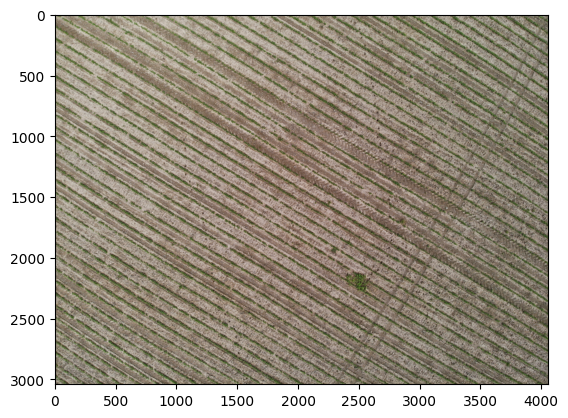

In [15]:
example_orderid = random.sample(order_ids, 1)[0]

im_list = env.eti_api.get_image_list_by_orderid(example_orderid, [2])
example_image_id = random.sample(im_list, 1)[0]

im_path = env.download_image(example_image_id)
image = io.imread(im_path)

plt.imshow(image)
plt.show()

In [ ]:
# DISPLAY IMAGES IN "IMAGES" FOLDER (DOWNLOADED)
import math

ncols = 2
nrows = math.ceil(len(images_paths_list)/ncols)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols)

print(ncols, nrows)

for i, ax in enumerate(axes.flat):
    if i < len(images_paths_list)-1:
        img = io.imread(images_paths_list[i])
        # ax.imshow(img, extent=[0, 500, 500, 0])
        ax.imshow(img)
        # ax.imshow(img, extent=[0, img.shape[1]*2, img.shape[0]*2, 0])
        ax.set_title(f"Plot {i+1}")
        ax.set_xticks([])
        ax.set_yticks([])

fig.tight_layout()
# fig.set_size_inches(200, 120)
plt.show()

In [7]:
image.shape

(3040, 4056, 3)

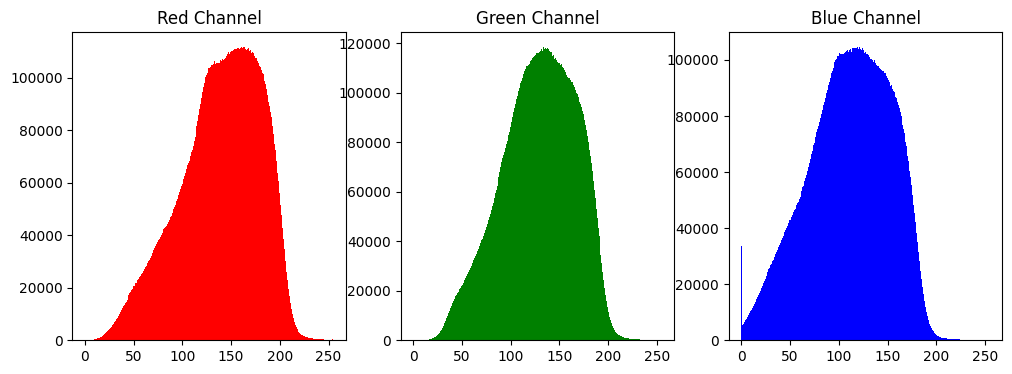

In [17]:
# PLOT HISTOGRAMS

red_channel = image[:, :, 0].ravel()
green_channel = image[:, :, 1].ravel()
blue_channel = image[:, :, 2].ravel()

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].hist(red_channel, bins=256, color='red')
axs[0].set_title('Red Channel')
axs[1].hist(green_channel, bins=256, color='green')
axs[1].set_title('Green Channel')
axs[2].hist(blue_channel, bins=256, color='blue')
axs[2].set_title('Blue Channel')

plt.show()

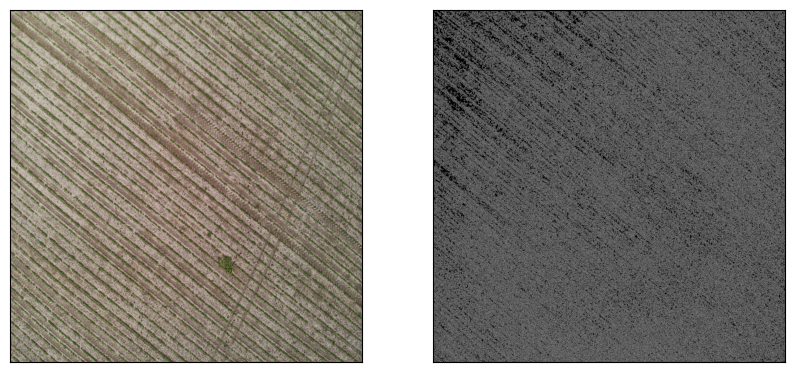

In [18]:
# APPLYING CANNY EDGE DETECTOR

t_lower = 70
t_upper = 200
  
edge = cv2.Canny(image, t_lower, t_upper)
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].imshow(image, extent=[0, 100, 0, 100])
axes[1].imshow(edge, extent=[0, 100, 0, 100], cmap='gray')

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
fig.set_size_inches(10, 5)
plt.show()

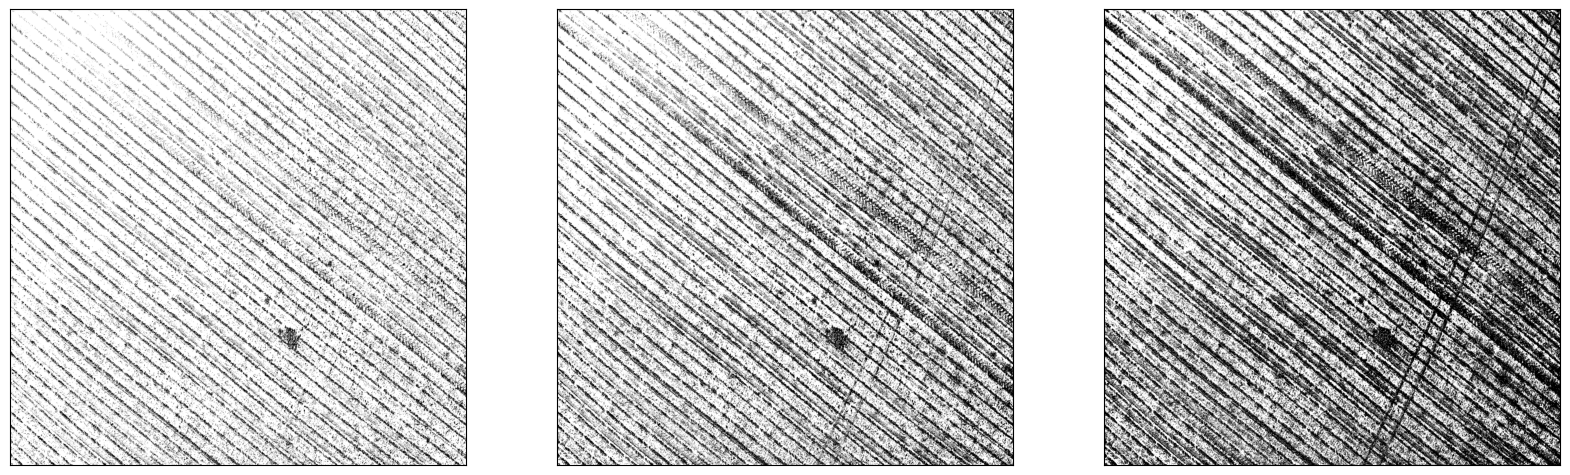

In [21]:
# THRESHOLDING THE IMAGE BY BRIGHTNESS VALUE

th_list = [80, 100, 120]
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
fig, axes = plt.subplots(nrows=1, ncols=len(th_list))

for i in range(len(th_list)):
    _, thresholded_img = cv2.threshold(gray_img, th_list[i], 255, cv2.THRESH_BINARY)
    thresholded_img = cv2.cvtColor(thresholded_img, cv2.COLOR_BGR2RGB)
    axes[i].imshow(thresholded_img, extent=[0, 100, 0, 100])

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
fig.set_size_inches(20, 10)
plt.show()

17


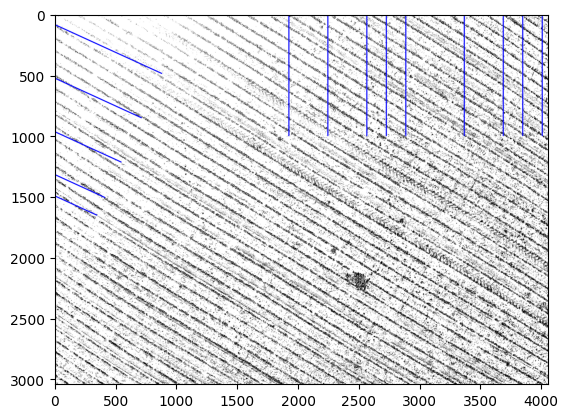

In [59]:
# TRYING TO DRAW HOUGH LINES 

_, thresholded_img = cv2.threshold(gray_img, th_list[0], 255, cv2.THRESH_BINARY)
thresholded_img = cv2.cvtColor(thresholded_img, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(thresholded_img, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray, threshold1=100, threshold2=150)

# Apply Hough transform for line detection
# lines = cv2.HoughLines(edges, rho=150, theta=np.pi/180, threshold=250)
lines = cv2.HoughLines(edges, rho=80, theta=2, threshold=50)

print(len(lines))
# print(lines)

# Draw the detected lines on the input image
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(thresholded_img, (x1, y1), (x2, y2), (0, 0, 255), 8)

# img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Display the result
plt.imshow(thresholded_img)
plt.show()

# Get mages data

In [60]:
downloaded_images_path = "images"
images_paths_list = glob.glob(os.path.join(downloaded_images_path, "*.jpg"))

img_ids_list = [int(os.path.basename(im_path).replace('.jpg', '')) for im_path in images_paths_list]


In [63]:
example_image_id = img_ids_list[10]

In [94]:
# images_data = pd.DataFrame(env.eti_api.get_images_data(img_ids_list)['images'])
# env.get_image_metadata(1000)

dict_keys(['imageID', 'identifier', 'parcelID', 'snapshotDate', 'timeGps', 'uploadDate', 'fieldID', 'cropID', 'flightID', 'clientID', 'heightAboveGround', 'quality', 'lat', 'lon', 'flag', 'healthy', 'expertReview', 'taggerReview', 'taggerDone', 'autoDone', 'blackList', 'hasTiles', 'format', 'height', 'width', 'focalLength', 'deleted', 'comment', 'stats', 'stamp', 'plantReport', 'orderID', 'cameraFileName', 'ignored', 'flightTargetHeight', 'cameraDegree', 'contrast', 'brightness', 'sharpness', 'typeId', 'groupUUID', 'cameraModel', 'footprintArea', 'footprintGeography', 'objectDistance', 'cameraAngle', 'tagsLastVersion', 'imgUrl', 'fieldName', 'farmID', 'farmName', 'clientName', 'fieldGeojson', 'cropName'])

In [101]:
# env.eti_api.get_images_data([example_image_id])
env.eti_api.get_images_data([example_image_id], type_ids=[2])['images'][0]['typeId']


2

In [60]:
pd.DataFrame(images_data['fields'])

,area,client_id,client_name,country_code,country_name,farm_id,farm_name,field_crop,field_geojson,field_id,field_latitude,field_longitude,field_name,organizations
0,101.309254,66098,Archive,US,United States,226590,Gary and Shelly Pitts,"{'crop_id': 167, 'crop_name': 'Unseeded', 'har...","{'coordinates': [[[[-97.131824633, 43.98574324...",942633,43.989331,-97.134334,NFO,"[{'id': 6313, 'name': 'Wilbur Ellis Sioux Fall..."
1,101.309254,66098,Archive,US,United States,226590,Gary and Shelly Pitts,"{'crop_id': 2, 'crop_name': 'Corn', 'harvest':...","{'coordinates': [[[[-97.131824633, 43.98574324...",942633,43.989331,-97.134334,NFO,"[{'id': 6313, 'name': 'Wilbur Ellis Sioux Fall..."
